# Import Libraries

In [21]:
import os  # For interacting with the file system
import pandas as pd  # For data manipulation and analysis
import xgboost as xgb  # For XGBoost classifier
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting the data and hyperparameter tuning
from sklearn.metrics import accuracy_score, classification_report  # For model evaluation
from sklearn.preprocessing import LabelEncoder  # For encoding labels into numeric values
import joblib  # For saving the trained model
import seaborn as sns  # For visualization
import matplotlib.pyplot as plt  # For visualization
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve  # For confusion matrix and ROC curve

# Data Loading and Preprocessing


In [2]:
# Load and Concatenate CSV Files
def load_csv_files(folder_path):
    """
    Load all CSV files from the specified folder and concatenate them into a single DataFrame.
    Each file's name (without extension) is used as the label.
    """
    dataframes = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".csv"):
            label = file_name.split(".")[0]  # Use the file name (without extension) as the label
            df = pd.read_csv(os.path.join(folder_path, file_name))
            df['label'] = label  # Add a label column
            dataframes.append(df)
    return pd.concat(dataframes, ignore_index=True)

# Data Loading
data_folder = r"data"
df = load_csv_files(data_folder)

# Select relevant columns for features and labels
selected_columns = ["Flex1", "Flex2", "Flex3", "Flex4", "Flex5", 
                    "AccelX", "AccelY", "AccelZ", "GyroX", "GyroY", "GyroZ", "label"]

# Ensure selected columns exist
df = df[selected_columns]

# Handle missing values by dropping rows with NaN values
df = df.dropna()

# Display label counts and explore the 'hellow' label
label_counts = df["label"].value_counts()
print("Label Counts:\n", label_counts)

label_hellow_count = df[df['label'] == 'hellow'].shape[0]
print(f"Number of instances of label 'hellow': {label_hellow_count}")

Label Counts:
 label
Yes           1286
No             973
I_Love_You     896
Hello          895
deaf           825
Now            699
Awkward        694
Sorry          673
Goodbye        664
a              662
Name: count, dtype: int64
Number of instances of label 'hellow': 0


# Data Splitting: Features and Labels

In [3]:
X = df[["Flex1", "Flex2", "Flex3", "Flex4", "Flex5", "AccelX", "AccelY", "AccelZ", "GyroX", "GyroY", "GyroZ"]]
y = df["label"]

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to numeric using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [22]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# XGBoost Model Initialization and Hyperparameter Tuning

In [ ]:
# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier( random_state=42,
    alpha=0.1, 
    lambda_=0.1,  )

# Train the model with the best hyperparameters and early stopping
early_stopping_rounds = 10  # Set early stopping to stop after 10 rounds of no improvement

best_xgb_model.fit(
    X_train_resampled, y_train_resampled,
    early_stopping_rounds=early_stopping_rounds,
    eval_metric="mlogloss",  # Evaluation metric (e.g., log-loss, or accuracy)
    eval_set=[(X_test, y_test)],  # Validation set for early stopping
    verbose=True  # Show progress
)

# After training, you can retrieve the number of boosting rounds used
print(f"Training stopped after {best_xgb_model.best_iteration} rounds due to early stopping.")

[0]	validation_0-mlogloss:1.88933
[1]	validation_0-mlogloss:1.62344
[2]	validation_0-mlogloss:1.42901
[3]	validation_0-mlogloss:1.27304
[4]	validation_0-mlogloss:1.14260
[5]	validation_0-mlogloss:1.03307
[6]	validation_0-mlogloss:0.93720
[7]	validation_0-mlogloss:0.85442
[8]	validation_0-mlogloss:0.78134


c:\Users\sa\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\sa\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-mlogloss:0.71668
[10]	validation_0-mlogloss:0.66010
[11]	validation_0-mlogloss:0.60867
[12]	validation_0-mlogloss:0.56251
[13]	validation_0-mlogloss:0.52104
[14]	validation_0-mlogloss:0.48324
[15]	validation_0-mlogloss:0.44907
[16]	validation_0-mlogloss:0.41883
[17]	validation_0-mlogloss:0.39037
[18]	validation_0-mlogloss:0.36522
[19]	validation_0-mlogloss:0.34174
[20]	validation_0-mlogloss:0.32077
[21]	validation_0-mlogloss:0.30167
[22]	validation_0-mlogloss:0.28458
[23]	validation_0-mlogloss:0.26858
[24]	validation_0-mlogloss:0.25379
[25]	validation_0-mlogloss:0.24003
[26]	validation_0-mlogloss:0.22826
[27]	validation_0-mlogloss:0.21736
[28]	validation_0-mlogloss:0.20716
[29]	validation_0-mlogloss:0.19779
[30]	validation_0-mlogloss:0.18885
[31]	validation_0-mlogloss:0.18136
[32]	validation_0-mlogloss:0.17440
[33]	validation_0-mlogloss:0.16785
[34]	validation_0-mlogloss:0.16198
[35]	validation_0-mlogloss:0.15634
[36]	validation_0-mlogloss:0.15088
[37]	validation_0-mlo

# Model Evaluation: Accuracy and Classification Report

In [24]:
# Model Evaluation: Accuracy and Classification Report
y_pred = best_xgb_model.predict(X_test)

# Convert the predicted labels back to their original form
y_pred_original = label_encoder.inverse_transform(y_pred)

# Convert the actual test labels back to their original form
y_test_original = label_encoder.inverse_transform(y_test)

cv_scores = cross_val_score(best_xgb_model, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean()}")


# Calculate accuracy
accuracy = accuracy_score(y_test_original, y_pred_original)
print(f"Model Accuracy: {accuracy}")

# Print the classification report with non-encoded labels
print("\nClassification Report:\n", classification_report(y_test_original, y_pred_original))

Cross-validation scores: [0.97581255 0.96976568 0.97354497 0.96293495 0.96822995]
Average cross-validation score: 0.9700576213003271
Model Accuracy: 0.9764207980652962

Classification Report:
               precision    recall  f1-score   support

     Awkward       0.99      0.97      0.98       145
     Goodbye       0.98      1.00      0.99       131
       Hello       0.96      0.98      0.97       176
  I_Love_You       0.98      0.97      0.98       183
          No       0.93      0.92      0.92       178
         Now       1.00      0.97      0.98       148
       Sorry       1.00      0.98      0.99       133
         Yes       0.96      0.99      0.97       260
           a       1.00      0.98      0.99       137
        deaf       1.00      1.00      1.00       163

    accuracy                           0.98      1654
   macro avg       0.98      0.98      0.98      1654
weighted avg       0.98      0.98      0.98      1654



# Save the Trained Model

In [25]:
joblib.dump(best_xgb_model, "xgb_model.pkl")

['xgb_model.pkl']

# Confusion Matrix

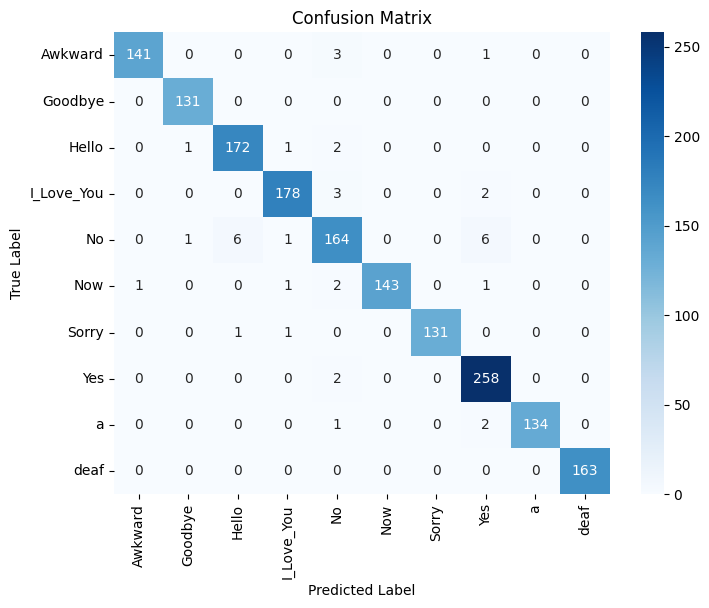

In [26]:
# Confusion Matrix
cm = confusion_matrix(y_test_original, y_pred_original)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve

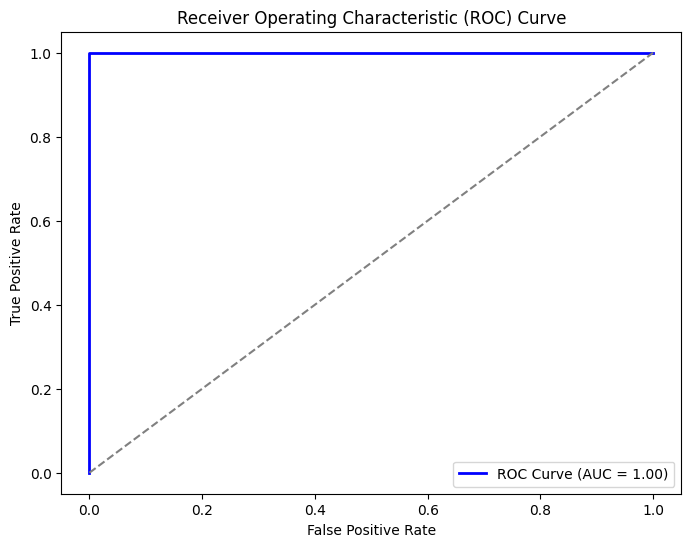

In [27]:
# ROC Curve (for multi-class classification, use OneVsRestClassifier if needed)
y_pred_prob = best_xgb_model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1], pos_label=1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Feature Importance Analysis

In [12]:
# Feature Importance Analysis
feature_importances = pd.Series(best_xgb_model.feature_importances_, index=X.columns)
print("\nFeature Importances:\n\n", feature_importances.sort_values(ascending=False))



Feature Importances:

 Flex4     0.189466
Flex5     0.183458
AccelZ    0.130560
Flex3     0.110650
AccelX    0.098210
Flex2     0.074202
Flex1     0.074021
AccelY    0.063083
GyroZ     0.039974
GyroX     0.024860
GyroY     0.011516
dtype: float32
